### Импорт библиотек

In [446]:

import numpy as np
import pandas as pd
import pickle   

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, KFold, GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error as mse, r2_score as r2

from IPython.display import Image
from pylab import rcParams

In [447]:
import warnings
warnings.filterwarnings('ignore')
matplotlib.rcParams.update({'font.size': 14})

In [448]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    """
    # дописать документация
    """
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))

    plt.figure(figsize=(18,10))
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

## Загрузка и первичное ознакомление с данными

In [449]:
DATASET_PATH = 'train.csv'
TEST_DATASET_PATH = 'test.csv'

In [450]:
df = pd.read_csv(DATASET_PATH, sep=',')
df.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644
5,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,0.309479,B,B,35,7715,4,990.0,0,6,B,215898.447742
6,14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,0.460556,B,B,20,4386,14,NaN,1,5,B,296021.204377
7,11993,74,2.0,80.312926,NaN,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664
8,5172,1,2.0,64.511437,NaN,1.0,9,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,229102.795999
9,8649,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,0.075779,B,B,6,1437,3,NaN,0,2,B,95380.220993


In [451]:
df.head(5)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [452]:
df.shape

(10000, 20)

In [453]:
df_test = pd.read_csv(TEST_DATASET_PATH, sep=',')
df_test.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
5,7633,53,1.0,40.675627,NaN,1.0,21,21.0,1977,0.049637,B,B,34,7759,0,229.0,1,3,B
6,13329,23,2.0,68.099538,64.843025,1.0,2,17.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
7,5502,32,2.0,48.193897,32.857644,6.0,5,14.0,1972,0.135650,B,B,46,7960,6,350.0,3,11,B
8,4220,96,3.0,72.277106,45.968758,9.0,17,17.0,1997,0.041116,B,B,53,14892,4,NaN,1,4,B
9,11538,6,3.0,80.219400,47.660260,9.0,13,17.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B


In [454]:
df_test.shape

(5000, 19)

In [455]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [456]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

В дата фреймах имеются пропуски. Необходимо обработать их при построении модели, а также учитывать при прогнозировании на тестовых данных

## Снижение потребления памяти

In [457]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [458]:
df = reduce_mem_usage(df)

Memory usage of dataframe is 1.53 MB
Memory usage after optimization is: 0.49 MB
Decreased by 68.1%


In [459]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             10000 non-null  int16   
 1   DistrictId     10000 non-null  int16   
 2   Rooms          10000 non-null  float32 
 3   Square         10000 non-null  float32 
 4   LifeSquare     7887 non-null   float32 
 5   KitchenSquare  10000 non-null  float32 
 6   Floor          10000 non-null  int8    
 7   HouseFloor     10000 non-null  float32 
 8   HouseYear      10000 non-null  int32   
 9   Ecology_1      10000 non-null  float32 
 10  Ecology_2      10000 non-null  category
 11  Ecology_3      10000 non-null  category
 12  Social_1       10000 non-null  int8    
 13  Social_2       10000 non-null  int16   
 14  Social_3       10000 non-null  int16   
 15  Healthcare_1   5202 non-null   float32 
 16  Helthcare_2    10000 non-null  int8    
 17  Shops_1        10000 non-null  i

In [460]:
df_test = reduce_mem_usage(df_test)

Memory usage of dataframe is 0.72 MB
Memory usage after optimization is: 0.21 MB
Decreased by 70.3%


# Изучение данных
## Изучение целевой переменной

In [461]:
target_mean = round(df['Price'].mean(), 2)
target_median = df['Price'].median()
target_mode = df['Price'].mode()[0]

print(f'средняя цена {target_mean}')
print(f'медиана {target_median}')
print(f'мода {target_mode}')

средняя цена 214139.22
медиана 192269.65625
мода 182938.078125


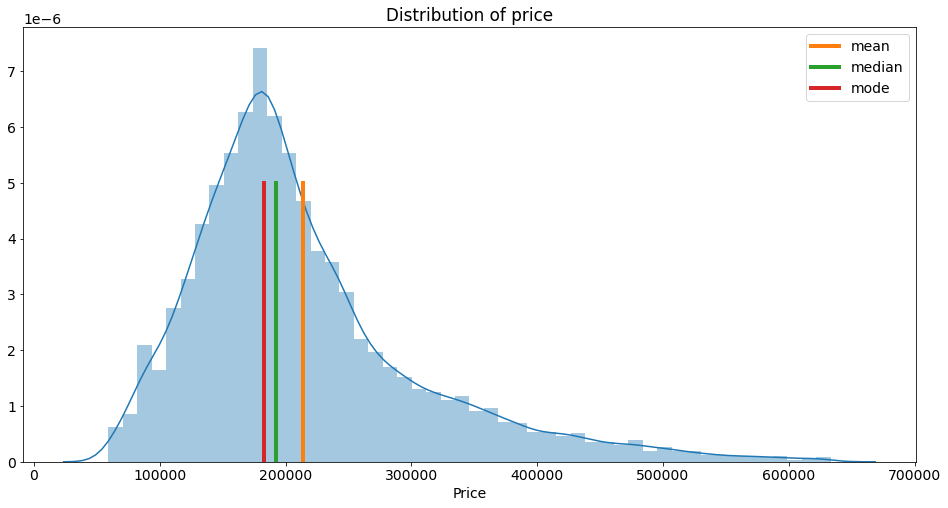

In [462]:
plt.figure(figsize = (16, 8))

sns.distplot(df['Price'], bins=50)

y = np.linspace(0, 0.000005, 10)
plt.plot([target_mean] * 10, y, label='mean',  linewidth=4)
plt.plot([target_median] * 10, y, label='median',  linewidth=4)
plt.plot([target_mode] * 10, y, label='mode', linewidth=4)

plt.title('Distribution of price')
plt.legend()
plt.show()

На получившемся графике видим стандартное, "правильное" распредление цены.

Смещение средней вправо относительно моды и медианы говорит о наличие квартир с очень высокой стоимостью

## Ознакомление с признаками

In [463]:
df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315712,37.199596,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904419,1.319500,4.231300,214139.218750
std,4859.01902,43.587592,0.839523,21.058718,86.241112,28.561113,5.241148,6.776192,2.005003e+05,0.119026,17.532614,4006.799803,23.831875,1021.518982,1.493601,4.806341,92872.304688
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.777344
25%,4169.50000,20.000000,1.000000,41.774879,22.769833,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.628906
50%,8394.50000,36.000000,2.000000,52.513309,32.781261,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.648438
75%,12592.50000,75.000000,2.000000,65.900627,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.460938
max,16798.00000,209.000000,19.000000,641.065186,7480.592285,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.437500


Необходимо изменить тип данных признака district на категориальный

В некоторых признаках есть значения равные 0, что противоречит логике.

Минимальное значение площади квартиры, площади кухни и жилой площади также смущают, кКак и максимальные значения площади, жилой площади и кухни.

Странное представление даты года постройки дома.

## Изучение категориальных признаков

In [464]:
df['Id'] = df['Id'].astype('category')
df['DistrictId'] = df['DistrictId'].astype('category')

In [465]:
df_obj_features = df.select_dtypes(include='category')
df_obj_features.head(5)

,Id,DistrictId,Ecology_2,Ecology_3,Shops_2
0,14038,35,B,B,B
1,15053,41,B,B,B
2,4765,53,B,B,B
3,5809,58,B,B,B
4,10783,99,B,B,B


In [466]:
district_price = df.groupby(["DistrictId"])["Price"].mean()

district_price.value_counts

<bound method IndexOpsMixin.value_counts of DistrictId
0      195295.593750
1      187805.406250
2      243688.625000
3      179905.015625
4      300096.687500
           ...      
202    394150.875000
205    220501.562500
207    426186.406250
208    431137.625000
209    140048.796875
Name: Price, Length: 205, dtype: float32>

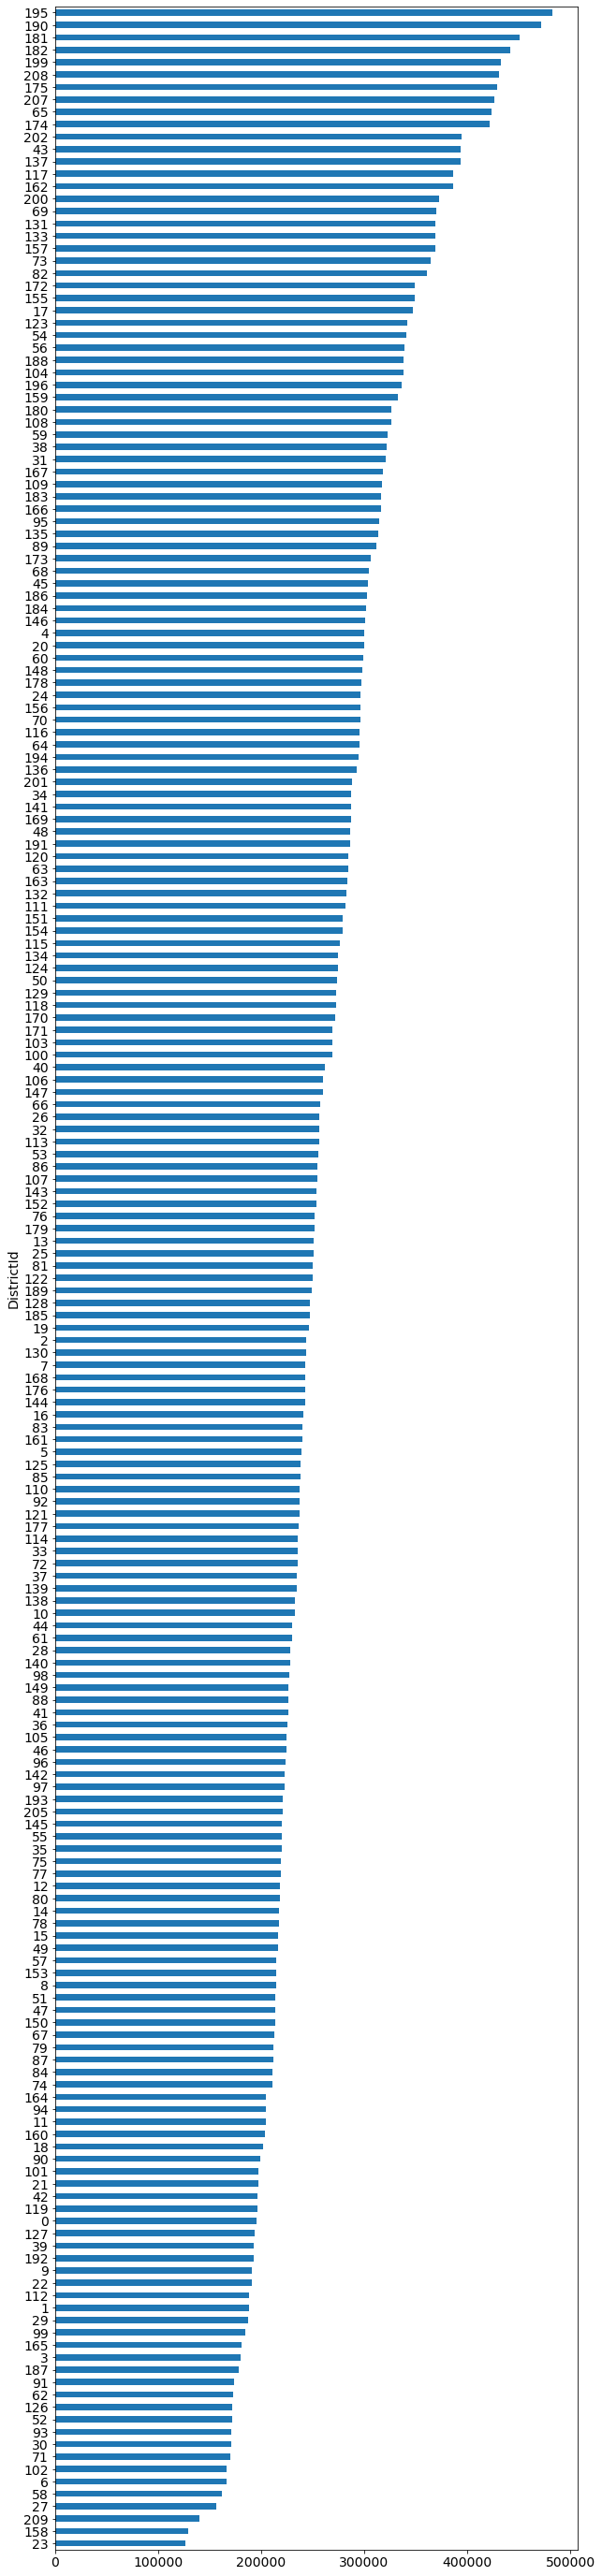

In [467]:
district_price = district_price.sort_values()
rcParams["figure.figsize"] = 10, 50

district_price.plot(kind="barh")

plt.show()

        Явная связь целевой переменной и района

In [468]:
district_size = df['DistrictId'].value_counts()

district_size.head()

27    851
1     652
23    565
6     511
9     294
Name: DistrictId, dtype: int64

In [469]:
df['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [470]:
df['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [471]:
df['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

## Изучение количественных признаков

In [472]:
df_num_features = df.select_dtypes(include=['float64', 'float32', 'float16', 'int8', 'int16', 'int32', 'int64'])
df_num_features.drop('Price', axis=1, inplace=True)

df_num_features

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
0,2.0,47.981560,29.442751,6.0,7,9.0,1969,0.089040,33,7976,5,NaN,0,11
1,3.0,65.683640,40.049541,8.0,7,9.0,1978,0.000070,46,10309,1,240.0,1,16
2,2.0,44.947952,29.197611,0.0,8,12.0,1968,0.049637,34,7759,0,229.0,1,3
3,2.0,53.352982,52.731510,9.0,8,17.0,1977,0.437885,23,5735,3,1084.0,0,5
4,1.0,39.649193,23.776169,7.0,11,12.0,1976,0.012339,35,5776,1,2078.0,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.0,50.401787,30.476204,5.0,6,5.0,1968,0.135650,46,7960,6,350.0,3,11
9996,1.0,41.521545,20.539215,9.0,13,13.0,2000,0.000000,30,5562,0,NaN,0,5
9997,1.0,47.939007,NaN,1.0,12,16.0,2015,0.072158,2,629,1,NaN,0,0
9998,2.0,43.602562,33.840149,8.0,1,5.0,1961,0.307467,30,5048,9,325.0,2,5


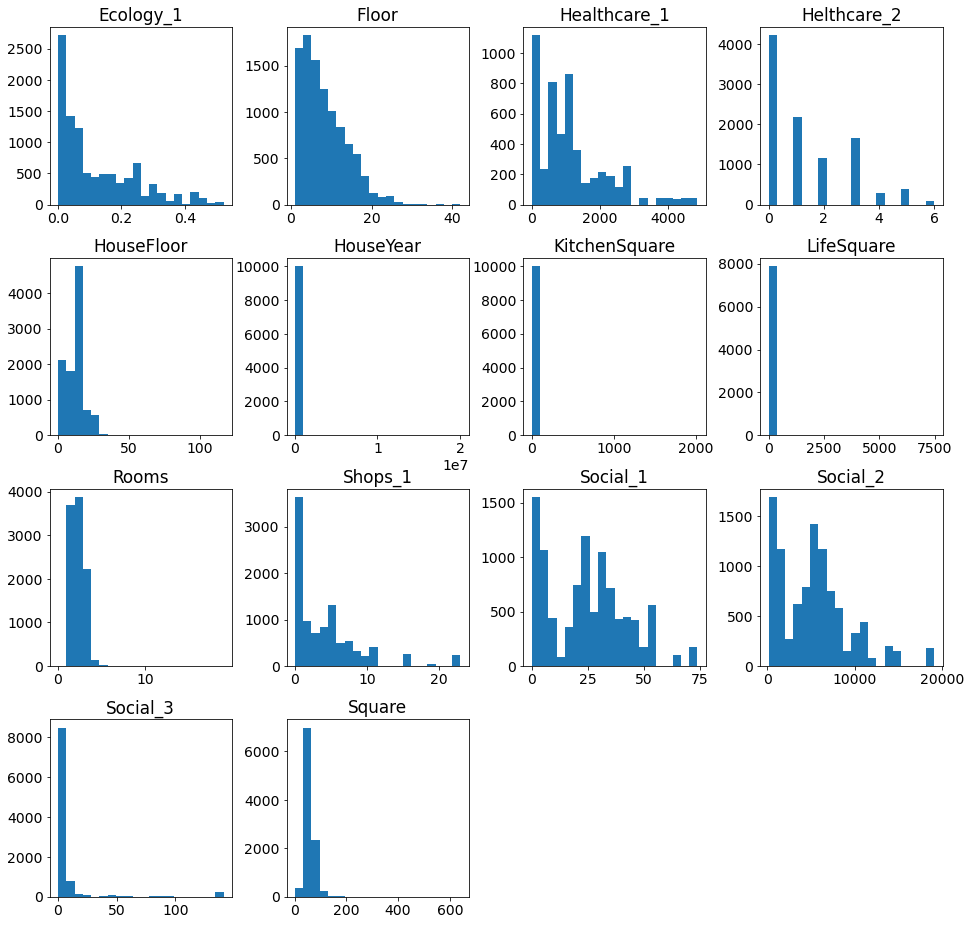

In [474]:
df_num_features.hist(figsize=(16,16), bins=20, grid=False);

## Обработка выбросов

#### Rooms

In [475]:
df['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

In [476]:
df.loc[df['Rooms'].isin([0, 10, 19]), 'Rooms'] = df['Rooms'].median()

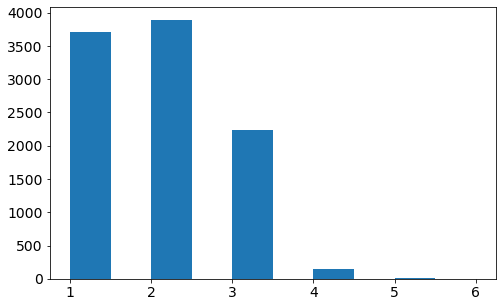

In [477]:
df['Rooms'].hist(figsize=(8,5), grid=False)

#### Square

In [478]:
df['Square'].describe()

count    10000.000000
mean        56.315712
std         21.058718
min          1.136859
25%         41.774879
50%         52.513309
75%         65.900627
max        641.065186
Name: Square, dtype: float64

In [479]:
square_mode = df['Square'].mode()[0]

square_mode

37.49816

In [481]:
square_max_value = np.quantile(df['Square'], q=0.99)
square_max_value

117.85611785888673

In [482]:
square_min_value = np.quantile(df['Square'], q=0.01)
square_min_value

29.71979543685913

In [483]:
square_extim_condition = (df['Square'] > square_max_value) | (df['Square'] < square_min_value)


In [484]:
df.loc[square_extim_condition, 'Square'] = df['Square'].median()

In [485]:
df['Square'].describe()

count    10000.000000
mean        55.605804
std         16.747128
min         29.719934
25%         42.029122
50%         52.513309
75%         65.441618
max        117.855972
Name: Square, dtype: float64

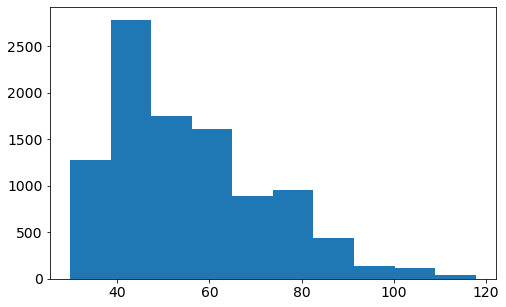

In [486]:
df['Square'].hist(figsize=(8,5), grid=False)

#### LifeSquare

In [487]:
df['LifeSquare'].describe()

count    7887.000000
mean       37.199596
std        86.241112
min         0.370619
25%        22.769833
50%        32.781261
75%        45.128803
max      7480.592285
Name: LifeSquare, dtype: float64

In [488]:
df[(df['LifeSquare'] > square_max_value) | (df['LifeSquare'] < square_min_value)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981560,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.937500
2,4765,53,2.0,44.947952,29.197611,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.906250
4,10783,99,1.0,39.649193,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531250
9,8649,23,1.0,46.461411,18.915552,8.0,13,17.0,2014,0.075779,B,B,6,1437,3,NaN,0,2,B,95380.218750
10,15370,28,2.0,46.304905,27.922585,6.0,8,9.0,1973,0.118537,B,B,30,6207,1,1183.0,1,0,B,204243.546875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9968,6653,17,2.0,41.157436,27.489712,6.0,3,19.0,1967,0.000000,B,B,18,3374,5,620.0,1,2,B,87265.398438
9977,10650,54,2.0,38.599781,22.740244,6.0,2,12.0,1970,0.006076,B,B,30,5285,0,645.0,6,6,B,174497.109375
9982,12805,8,1.0,39.195152,22.158768,9.0,12,12.0,1968,0.437885,B,B,23,5735,3,1084.0,0,5,B,177449.718750
9996,6159,18,1.0,41.521545,20.539215,9.0,13,13.0,2000,0.000000,B,B,30,5562,0,NaN,0,5,A,189050.296875


большое количество квартир с жилой площадью, больше чем площадь квартиры

In [489]:
df.loc[df['LifeSquare'] > df['Square'], 'LifeSquare'] = df['LifeSquare'].median()
df.loc[(df['LifeSquare'] < df['Square'] * 0.4), 'LifeSquare'] = df['LifeSquare'].median()

In [490]:
df['LifeSquare'].describe()

count    7887.000000
mean       34.981514
std        13.448578
min        12.125029
25%        23.977295
50%        32.781261
75%        42.197826
max       115.110474
Name: LifeSquare, dtype: float64

In [491]:
df['LifeSquare'].value_counts()

32.781261    851
33.859653      2
35.999996      1
21.169897      1
23.169222      1
            ... 
45.673462      1
18.836775      1
67.347176      1
62.673653      1
37.604706      1
Name: LifeSquare, Length: 7036, dtype: int64

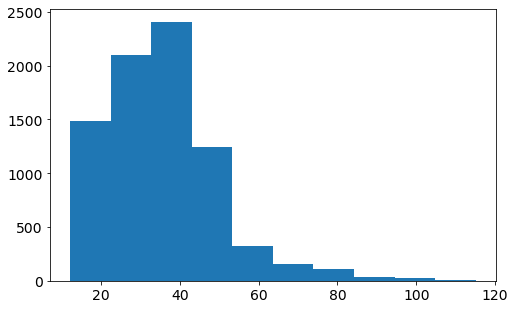

In [492]:
df['LifeSquare'].hist(figsize=(8,5), grid=False)

#### KitchenSquare

In [493]:
df['KitchenSquare'].describe()

count    10000.000000
mean         6.273300
std         28.561113
min          0.000000
25%          1.000000
50%          6.000000
75%          9.000000
max       2014.000000
Name: KitchenSquare, dtype: float64

In [494]:
df.loc[(df['KitchenSquare'] > df['Square'] * 0.25), 'KitchenSquare'] = df['KitchenSquare'].median()
df.loc[(df['KitchenSquare'] < df['Square'] * 0.05), 'KitchenSquare'] = df['KitchenSquare'].median()

In [495]:
df['KitchenSquare'].value_counts()

6.0     4509
8.0     1303
5.0     1168
10.0     961
9.0      800
7.0      609
12.0     231
11.0     216
13.0      52
4.0       38
14.0      34
15.0      22
3.0       20
16.0      12
20.0       8
17.0       7
18.0       3
22.0       3
19.0       3
27.0       1
Name: KitchenSquare, dtype: int64

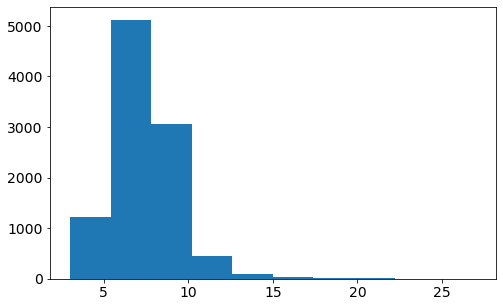

In [496]:
df['KitchenSquare'].hist(figsize=(8,5), grid=False)

In [497]:
df['KitchenSquare'].describe()

count    10000.000000
mean         7.190800
std          2.042218
min          3.000000
25%          6.000000
50%          6.000000
75%          8.000000
max         27.000000
Name: KitchenSquare, dtype: float64

#### HouseFloor, Floor

In [498]:
df.HouseFloor.describe()

count    10000.000000
mean        12.609400
std          6.776192
min          0.000000
25%          9.000000
50%         13.000000
75%         17.000000
max        117.000000
Name: HouseFloor, dtype: float64

In [499]:
df.loc[(df['HouseFloor'] == 0) & (df['Floor'] > 0), 'HouseFloor'] = df['HouseFloor'].median()   

In [500]:
df.HouseFloor.describe()

count    10000.000000
mean        12.959100
std          6.443546
min          1.000000
25%          9.000000
50%         13.000000
75%         17.000000
max        117.000000
Name: HouseFloor, dtype: float64

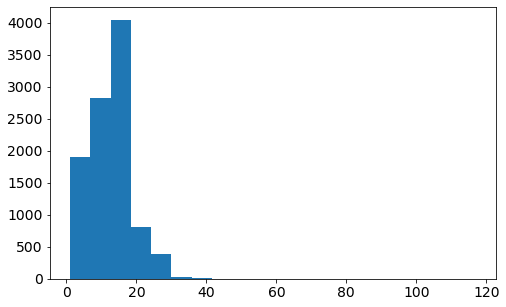

In [501]:
df['HouseFloor'].hist(figsize=(8,5), bins=20, grid=False)

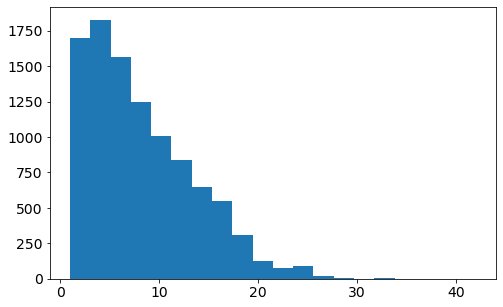

In [502]:
df['Floor'].hist(figsize=(8,5), bins=20, grid=False)

#### HouseYear

In [503]:
df['HouseYear'].value_counts()

1977        2652
2017         308
2016         305
2015         299
2014         210
            ... 
1947           1
1916           1
1910           1
1928           1
20052011       1
Name: HouseYear, Length: 97, dtype: int64

In [504]:
df.loc[df['HouseYear'] > 2020, 'HouseYear'] = 2020

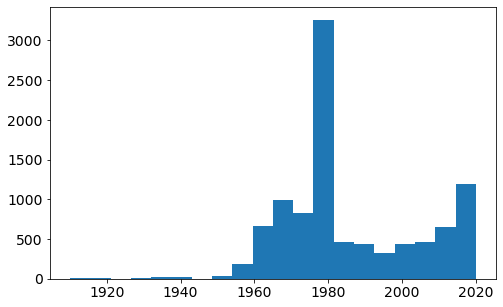

In [505]:
df['HouseYear'].hist(figsize=(8,5), bins=20, grid=False)

## Обработка пропусков

In [506]:
df.isna().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [507]:
df['Healthcare_1'].value_counts()

540.0     511
30.0      348
1046.0    245
750.0     163
229.0     148
         ... 
370.0      14
32.0       12
1815.0     10
35.0        2
0.0         1
Name: Healthcare_1, Length: 79, dtype: int64

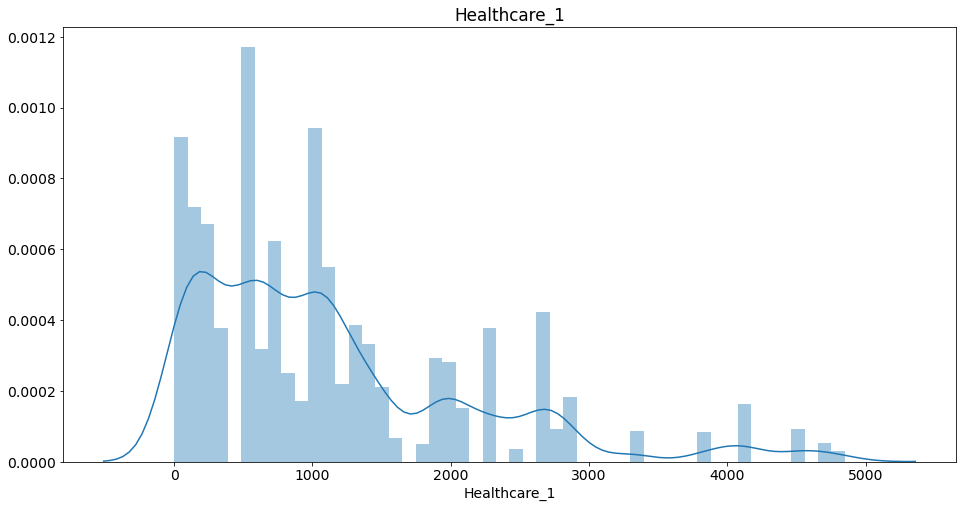

In [508]:
plt.figure(figsize = (16, 8))

sns.distplot(df['Healthcare_1'], bins=50)

y = np.linspace(0, 0.000005, 10)

plt.title('Healthcare_1')
plt.show()

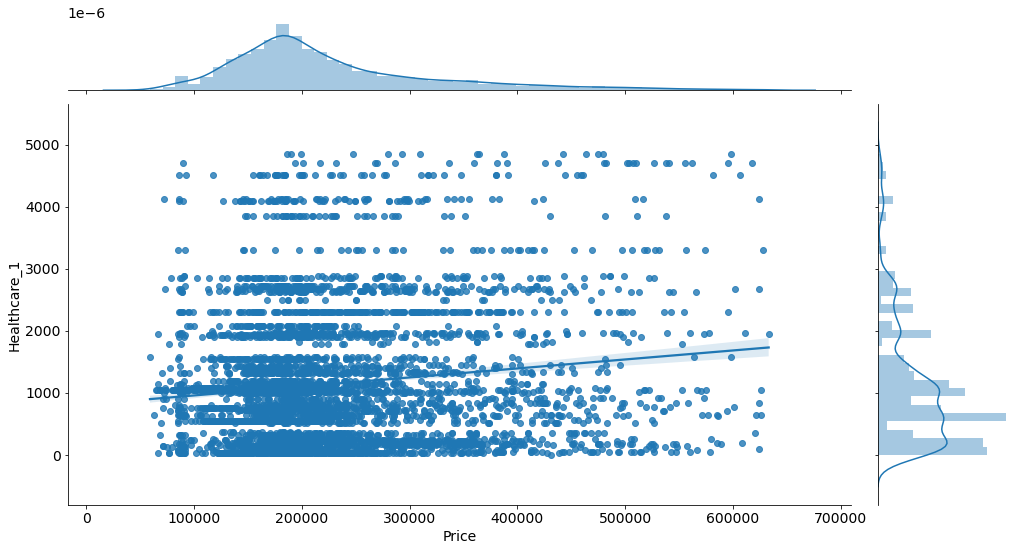

In [509]:
grid = sns.jointplot(df['Price'], df['Healthcare_1'], kind='reg')
grid.fig.set_figwidth(16)
grid.fig.set_figheight(8)

plt.show()

Отсутсвует около половины данных по признаку Healthcare_1. 

Структура распределения признака Healthcare_1 в целом соответсвует структуре распределения целевой переменной и вероятно является значимым призаком. В связи с этим представляется целесообразным сохранить этот признак даже не смотря на большое количество пропусков.

Пропущенным значениям будет присвоено значение медианы и будет добавлен дополнительный признак, указывающий на то, что заполнялся пропуск 

In [510]:
df['Healthcare_1_nan'] = 0

df.loc[df['Healthcare_1'].isna(), 'Healthcare_1_nan'] = 1

median_Healthcare1 = df['Healthcare_1'].median()

df['Healthcare_1'] = df['Healthcare_1'].fillna(median_Healthcare1)

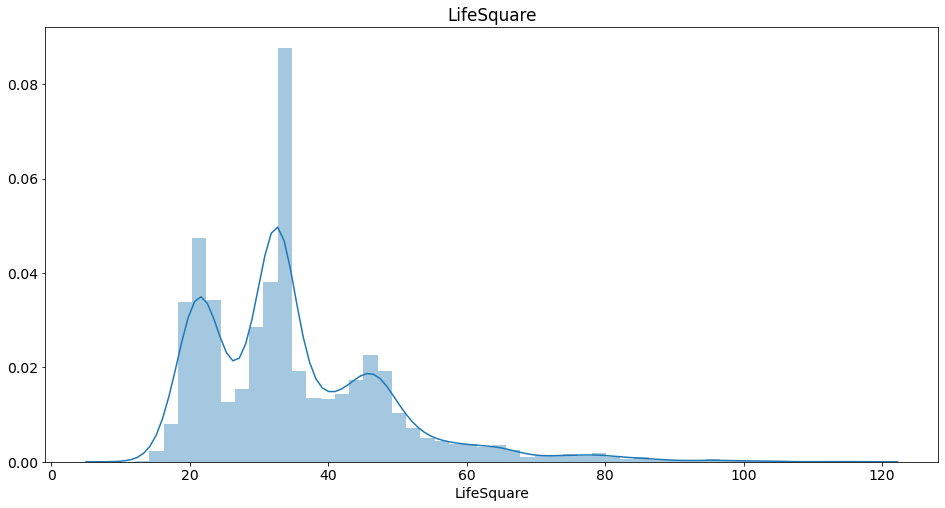

In [511]:
plt.figure(figsize = (16, 8))

sns.distplot(df['LifeSquare'], bins=50)

y = np.linspace(0, 0.000005, 10)

plt.title('LifeSquare')
plt.show()

In [512]:
df['LifeSquare'].median()

32.7812614440918

In [513]:
df['LifeSquare_nan'] = 0

df.loc[df['LifeSquare'].isna(), 'LifeSquare_nan'] = 1

median_Healthcare1 = df['LifeSquare'].median()

df['LifeSquare'] = df['LifeSquare'].fillna(median_Healthcare1)

In [514]:
df.isna().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare          0
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1        0
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
Healthcare_1_nan    0
LifeSquare_nan      0
dtype: int64

### Новые признаки

#### Стоимость квадраного метра в разных районах

In [515]:
df['price_per_metr'] = df['Price']/df['Square']

In [516]:
df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Healthcare_1_nan,LifeSquare_nan,price_per_metr
0,14038,35,2.0,47.981560,29.442751,6.0,7,9.0,1969,0.089040,...,7976,5,900.0,0,11,B,184966.937500,1,0,3854.958740
1,15053,41,3.0,65.683640,40.049541,8.0,7,9.0,1978,0.000070,...,10309,1,240.0,1,16,B,300009.437500,0,0,4567.491211
2,4765,53,2.0,44.947952,29.197611,6.0,8,12.0,1968,0.049637,...,7759,0,229.0,1,3,B,220925.906250,0,0,4915.149414
3,5809,58,2.0,53.352982,52.731510,9.0,8,17.0,1977,0.437885,...,5735,3,1084.0,0,5,B,175616.234375,0,0,3291.591797
4,10783,99,1.0,39.649193,23.776169,7.0,11,12.0,1976,0.012339,...,5776,1,2078.0,2,4,B,150226.531250,0,0,3788.892578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,77,32,2.0,50.401787,30.476204,5.0,6,5.0,1968,0.135650,...,7960,6,350.0,3,11,B,196684.312500,0,0,3902.328125
9996,6159,18,1.0,41.521545,20.539215,9.0,13,13.0,2000,0.000000,...,5562,0,900.0,0,5,A,189050.296875,1,0,4553.064941
9997,5123,27,1.0,47.939007,32.781261,6.0,12,16.0,2015,0.072158,...,629,1,900.0,0,0,A,159143.812500,1,1,3319.714355
9998,5400,75,2.0,43.602562,33.840149,8.0,1,5.0,1961,0.307467,...,5048,9,325.0,2,5,B,181595.343750,0,0,4164.786133


In [517]:
district_price = df.groupby(["DistrictId"])["price_per_metr"].mean()

In [518]:
district_price = pd.DataFrame(district_price)
district_price.rename(columns={'price_per_metr': 'District_mean_price'}, inplace=True)
district_price

,District_mean_price
DistrictId,
0,3573.422363
1,3234.672119
2,4560.204590
3,3743.338867
4,5427.523926
...,...
202,7447.527832
205,5101.016602
207,5550.678223


In [519]:
df = df.merge(district_price, on='DistrictId')

In [520]:
df.loc[df['DistrictId'] == 209]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Healthcare_1_nan,LifeSquare_nan,price_per_metr,District_mean_price
9997,11911,209,1.0,33.533077,18.101126,5.0,7,5.0,1965,0.040243,...,11,2729.0,3,1,B,140048.796875,0,0,4176.4375,4176.4375


#### Бинарные признаки

In [521]:
df['Ecology_2_bin'] = df['Ecology_2'].replace({'A':0, 'B':1})
df['Ecology_3_bin'] = df['Ecology_3'].replace({'A':0, 'B':1})
df['Shops_2_bin'] = df['Shops_2'].replace({'A':0, 'B':1})

In [522]:
df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Shops_1,Shops_2,Price,Healthcare_1_nan,LifeSquare_nan,price_per_metr,District_mean_price,Ecology_2_bin,Ecology_3_bin,Shops_2_bin
0,14038,35,2.0,47.981560,29.442751,6.0,7,9.0,1969,0.089040,...,11,B,184966.937500,1,0,3854.958740,4384.628418,1,1,1
1,4698,35,3.0,63.851402,47.245735,6.0,7,9.0,1971,0.089040,...,11,B,242403.718750,1,0,3796.372559,4384.628418,1,1,1
2,8610,35,1.0,47.410774,32.781261,6.0,4,13.0,1977,0.089040,...,11,B,218138.093750,1,1,4601.023438,4384.628418,1,1,1
3,8401,35,2.0,43.325817,22.487877,6.0,7,14.0,1969,0.089040,...,11,B,194175.390625,1,0,4481.748047,4384.628418,1,1,1
4,12932,35,1.0,46.287193,32.781261,6.0,13,12.0,2015,0.089040,...,11,B,195895.984375,1,1,4232.185547,4384.628418,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15391,184,3.0,64.048843,42.844486,6.0,4,5.0,1928,0.246624,...,6,B,324303.812500,1,0,5063.382812,5351.462891,1,1,1
9996,16543,205,1.0,43.226986,18.663548,8.0,12,12.0,2007,0.169091,...,5,B,220501.562500,1,0,5101.016602,5101.016602,1,1,1
9997,11911,209,1.0,33.533077,18.101126,5.0,7,5.0,1965,0.040243,...,1,B,140048.796875,0,0,4176.437500,4176.437500,1,1,1
9998,15968,158,2.0,53.164776,33.362309,7.0,14,14.0,1967,0.000000,...,8,B,170893.640625,0,0,3214.414795,2298.367188,1,1,1


### Перенос признаков на тестовый датосет

In [525]:
df_test['Ecology_2_bin'] = df_test['Ecology_2'].replace({'A':0, 'B':1})
df_test['Ecology_3_bin'] = df_test['Ecology_3'].replace({'A':0, 'B':1})
df_test['Shops_2_bin'] = df_test['Shops_2'].replace({'A':0, 'B':1})

In [526]:
df_test = df_test.merge(district_price, on='DistrictId', how='left')

In [527]:
df_test

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,District_mean_price
0,725,58,2.0,49.882645,33.432781,6.0,6,14.0,1972,0.310199,...,2748,1,NaN,0,0,B,1,1,1,3032.895752
1,15856,74,2.0,69.263184,NaN,1.0,6,1.0,1977,0.075779,...,1437,3,NaN,0,2,B,1,1,1,3394.161621
2,5480,190,1.0,13.597818,15.948246,12.0,2,5.0,1909,0.000000,...,7538,87,4702.0,5,5,B,1,1,1,7919.443359
3,15664,47,2.0,73.046608,51.940842,9.0,22,22.0,2007,0.101872,...,4583,3,NaN,3,3,B,1,1,1,4116.345215
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,...,629,1,NaN,0,0,A,1,1,0,2791.438965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8180,11,3.0,67.133911,50.809795,6.0,5,9.0,1973,0.000170,...,5992,0,NaN,1,1,B,1,1,1,4055.974854
4996,4695,1,1.0,40.198471,21.807060,10.0,12,17.0,2017,0.007122,...,264,0,NaN,0,1,B,1,1,1,3234.672119
4997,5783,12,3.0,77.842178,48.282623,9.0,23,22.0,1989,0.090799,...,19083,2,NaN,5,15,B,1,1,1,4106.496094
4998,4780,62,2.0,81.305222,NaN,0.0,4,0.0,1977,0.072158,...,629,1,NaN,0,0,A,1,1,0,2910.826904


### Выбор признаков

In [528]:
df.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price',
 'Healthcare_1_nan',
 'LifeSquare_nan',
 'price_per_metr',
 'District_mean_price',
 'Ecology_2_bin',
 'Ecology_3_bin',
 'Shops_2_bin']

In [529]:
feature_names = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear',
                 'Ecology_1', 'Ecology_2_bin', 'Ecology_3_bin', 'Social_1', 'Social_2', 'Social_3',
                 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Shops_2_bin', 'Healthcare_1_nan', 'LifeSquare_nan', 
                 'District_mean_price']

target_name = 'Price'

In [530]:
df.shape

(10000, 27)

In [531]:
df_test.shape

(5000, 23)

### Разбиение на трейн и тест

In [532]:
X = df[feature_names]
y = df[target_name]

In [533]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=21)

In [538]:
#  max_depth=7, min_samples_leaf=50, n_estimators=50 Test R2:	0.712  5.0	24.0	272.0	0.744


gb_model = GradientBoostingRegressor(criterion='mse',
                                        max_depth=5,
                                        min_samples_leaf=20,
                                        random_state=42,
                                        n_estimators=74)

In [539]:
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(criterion='mse', max_depth=5, min_samples_leaf=20,
                          n_estimators=74, random_state=42)

In [540]:
y_preds = gb_model.predict(X_valid)

In [541]:
r2(y_valid, y_preds)

0.7460748534665967

Train R2:	0.817
Test R2:	0.746


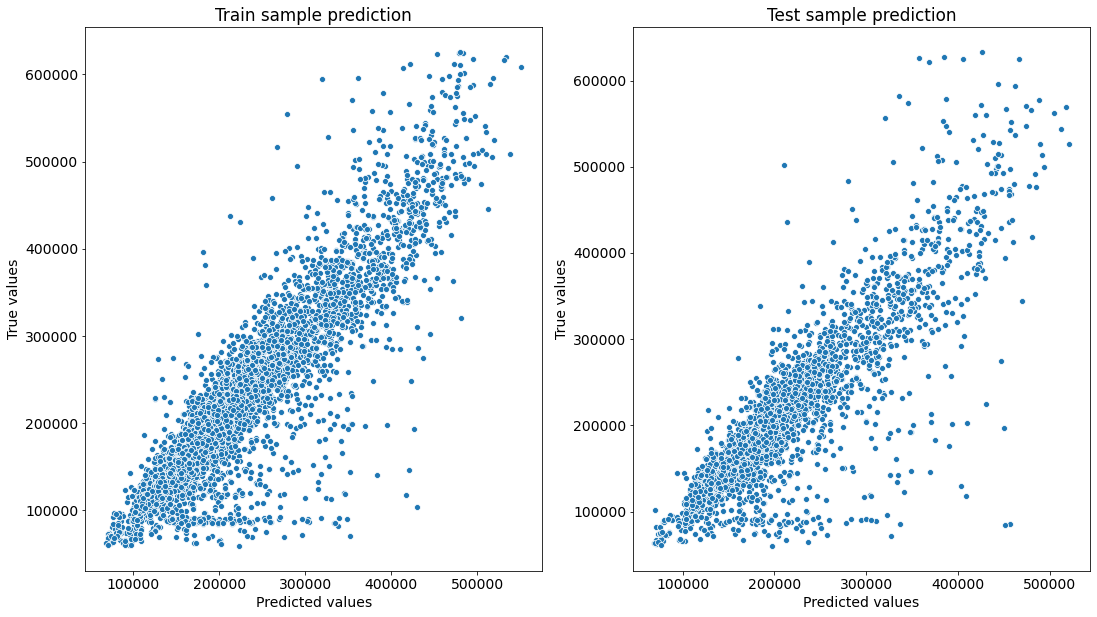

In [543]:
y_train_preds = gb_model.predict(X_train)
y_test_preds = gb_model.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

#Train R2:	0.967
#Test R2:	0.696
# ~ 10%

## Подготовка тестового датасета

In [544]:
df_test['Healthcare_1_nan'] = 0

df_test.loc[df['Healthcare_1'].isna(), 'Healthcare_1_nan'] = 1

median_Healthcare1 = df_test['Healthcare_1'].median()

df_test['Healthcare_1'] = df_test['Healthcare_1'].fillna(median_Healthcare1)

In [545]:
df_test['LifeSquare_nan'] = 0

df_test.loc[df['LifeSquare'].isna(), 'LifeSquare_nan'] = 1

median_Healthcare1 = df_test['LifeSquare'].median()

df_test['LifeSquare'] = df_test['LifeSquare'].fillna(median_Healthcare1)

In [546]:

median_District_mean_price = df_test['District_mean_price'].median()

df_test['District_mean_price'] = df_test['District_mean_price'].fillna(median_Healthcare1)

In [547]:
prepared_df_test = df_test[feature_names]

In [548]:
y_test_preds = gb_model.predict(prepared_df_test)

In [549]:
y_test_preds

array([161801.4979773 , 186287.69440239, 310591.60097349, ...,
       370991.54636686, 179625.04853057, 163235.71520101])

### Сохранение файла с прогнозами

In [551]:
test_id = df_test["Id"]
pred_df = pd.DataFrame()
pred_df["Id"] = test_id
pred_df["Price"] = y_test_preds
assert pred_df.shape[0] == 5000, f"Real pred-shape = {pred_df.shape[0]}, Expected pred-shape = 5000"

pred_df.to_csv("AProtsenko_predictions.csv", index=False)

In [552]:
pred_df

,Id,Price
0,725,161801.497977
1,15856,186287.694402
2,5480,310591.600973
3,15664,332365.708626
4,14275,128815.490029
...,...,...
4995,8180,238011.109547
4996,4695,136246.773195
4997,5783,370991.546367
4998,4780,179625.048531
